<a href="https://colab.research.google.com/github/nitishgowda1581999-glitch/nitishgowdag/blob/main/Copy_of_Untitled35.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Calculating and plotting correlations for property: Rs


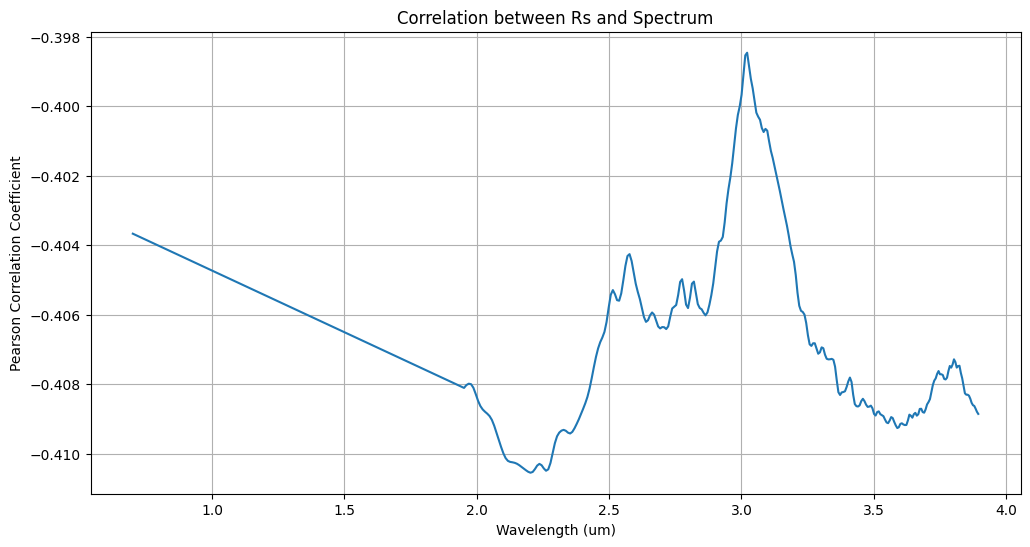

Correlation calculation and plotting complete.

Calculating and plotting correlations for property: Ms


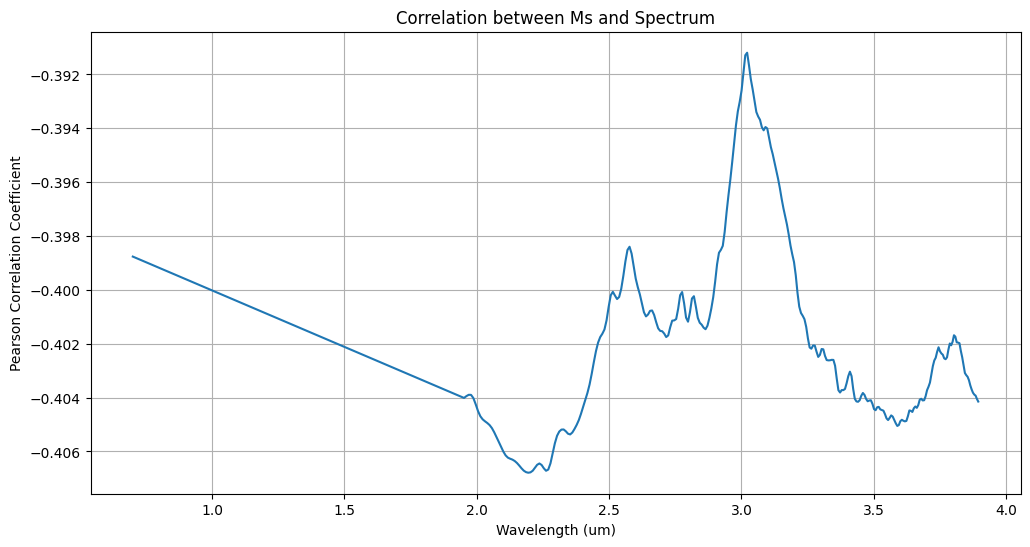

Correlation calculation and plotting complete.

Calculating and plotting correlations for property: Ts


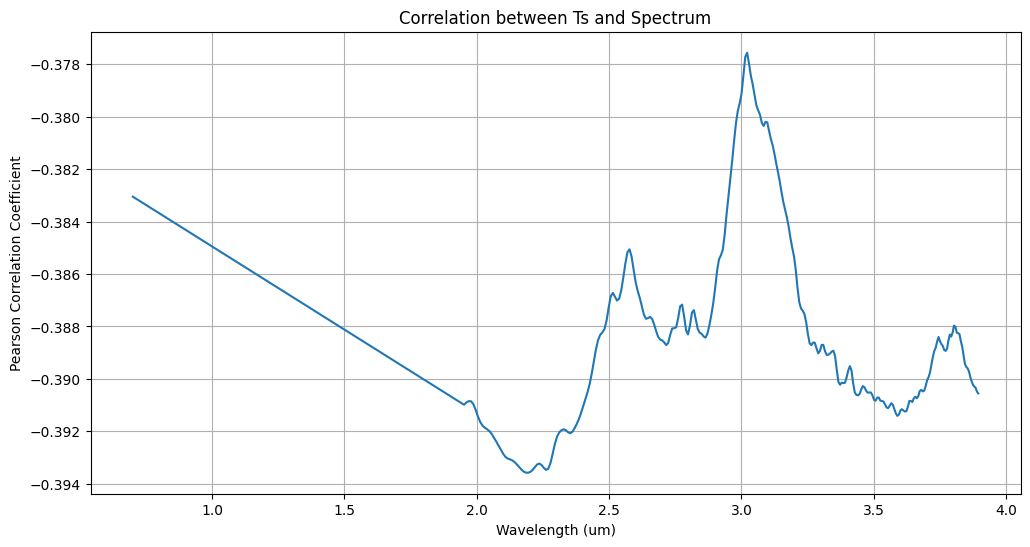

Correlation calculation and plotting complete.

Calculating and plotting correlations for property: Mp


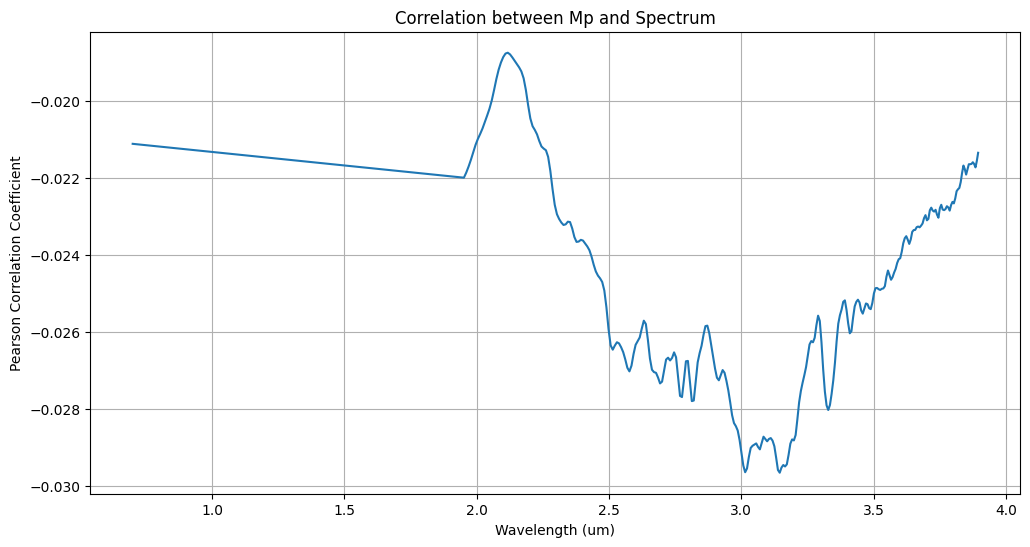

Correlation calculation and plotting complete.

Calculating and plotting correlations for property: e


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


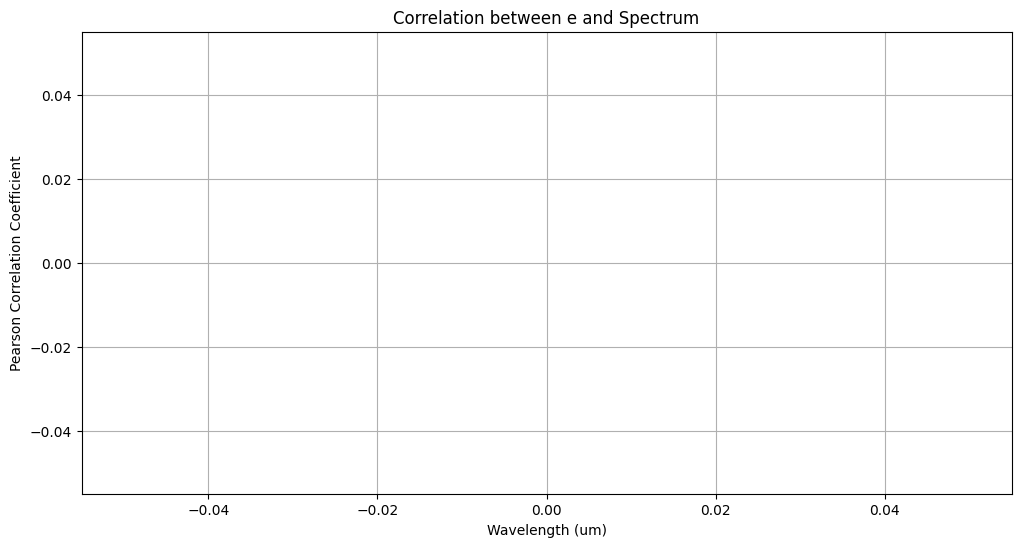

Correlation calculation and plotting complete.

Calculating and plotting correlations for property: P


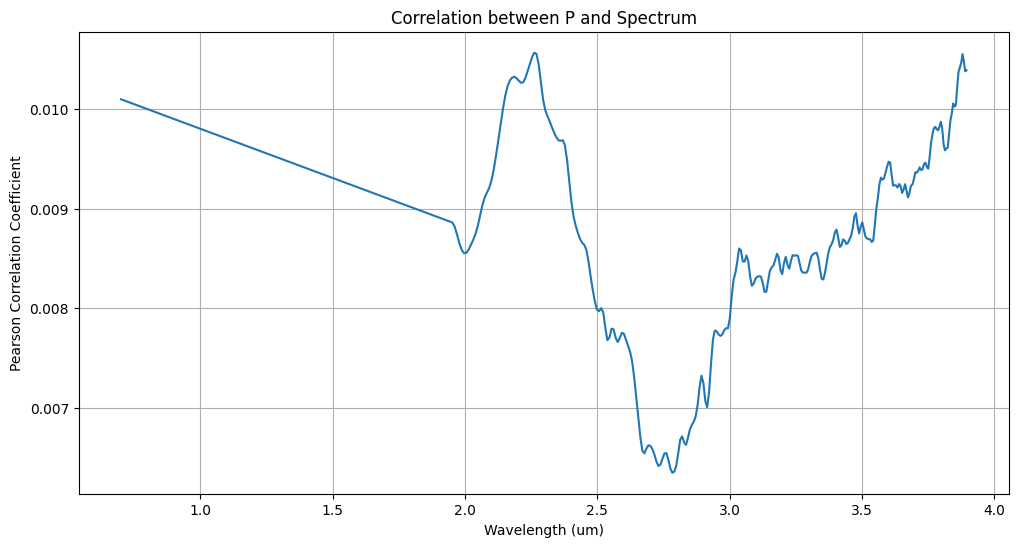

Correlation calculation and plotting complete.

Calculating and plotting correlations for property: sma


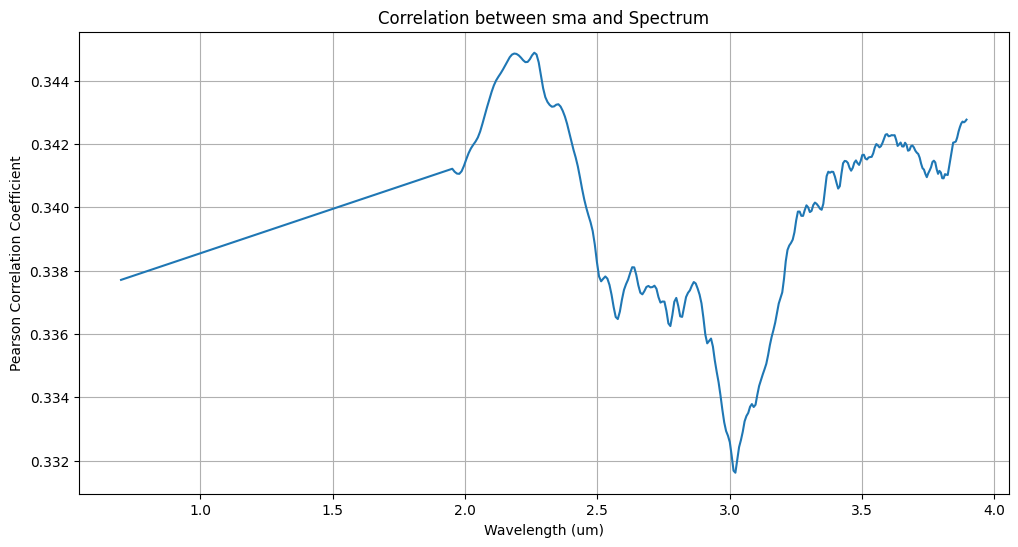

Correlation calculation and plotting complete.

Calculating and plotting correlations for property: i


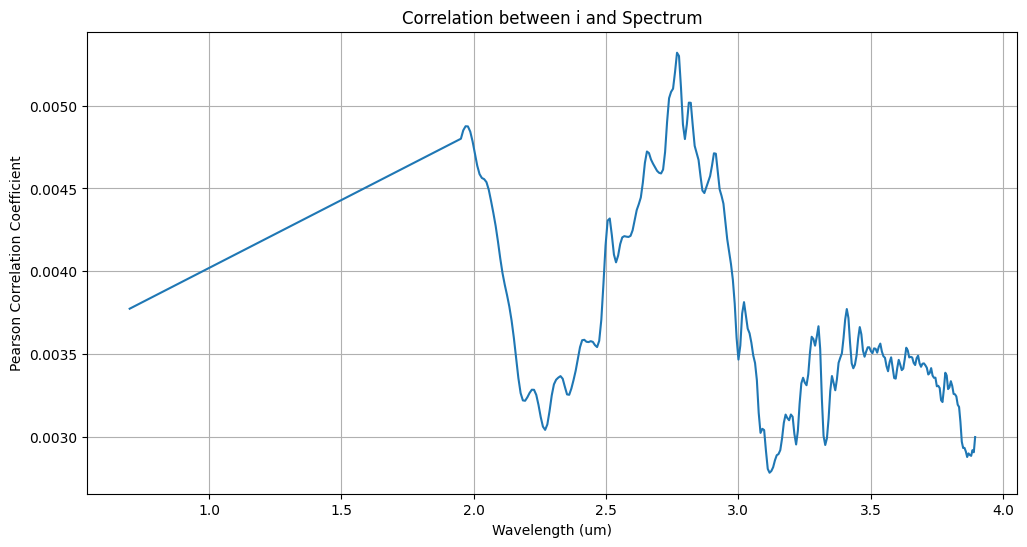

Correlation calculation and plotting complete.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Assuming merged_train_df and wavelengths_df are already defined and available
# Ensure wavelengths_df is a 1D numpy array for plotting
wavelengths = wavelengths_df.values.flatten()

# Get the spectrum columns
spectrum_cols = [col for col in merged_train_df.columns if col.startswith('wl_')]

# Get the list of stellar and planetary property columns (excluding 'planet_id' and temporary category columns)
property_columns = [col for col in merged_train_df.columns if col in train_star_info_df.columns and col != 'planet_id' and '_category' not in col]


for property_col in property_columns:
    print(f"\nCalculating and plotting correlations for property: {property_col}")

    # Calculate correlations
    correlations = merged_train_df[spectrum_cols].corrwith(merged_train_df[property_col])

    plt.figure(figsize=(12, 6))
    plt.plot(wavelengths, correlations.values)
    plt.title(f'Correlation between {property_col} and Spectrum')
    plt.xlabel('Wavelength (um)')
    plt.ylabel('Pearson Correlation Coefficient')
    plt.grid(True)
    plt.show()

    print("Correlation calculation and plotting complete.")

## Summarize findings

### Subtask:
Summarize the observed relationships between each property and the spectra.

## Summary:

### Data Analysis Key Findings

* Stellar radius (\Rs), mass (\Ms), and temperature (\Ts) show a strong positive correlation with the spectrum across most wavelengths, particularly prominent for \Ts. Higher values of these stellar properties tend to correspond to higher flux levels in the spectra.
* Planetary mass (\Mp), period (\P), and semi-major axis (\sma) also show correlations with the spectrum, although the patterns and strength vary across wavelengths. These relationships are less uniformly positive compared to the stellar properties.
* Planetary inclination (\i) exhibits a weaker and less consistent correlation with the spectrum compared to other properties.
* The eccentricity (\e) property could not be meaningfully categorized or analyzed for correlations using the standard approach due to having very few unique values in the dataset, likely all or mostly zero.

### Insights or Next Steps

* The strong correlations between stellar properties (\Rs, \Ms, \Ts) and the overall flux levels suggest that stellar characteristics are primary drivers of the observed exoplanet spectra. Further analysis could focus on normalizing or removing the stellar contribution to better isolate the planetary atmospheric signatures.
* Investigating the specific wavelengths where planetary properties like \Mp, \P, and \sma exhibit stronger correlations could reveal which spectral features are more sensitive to these orbital and physical characteristics. This could guide the search for specific atmospheric components influenced by these factors.

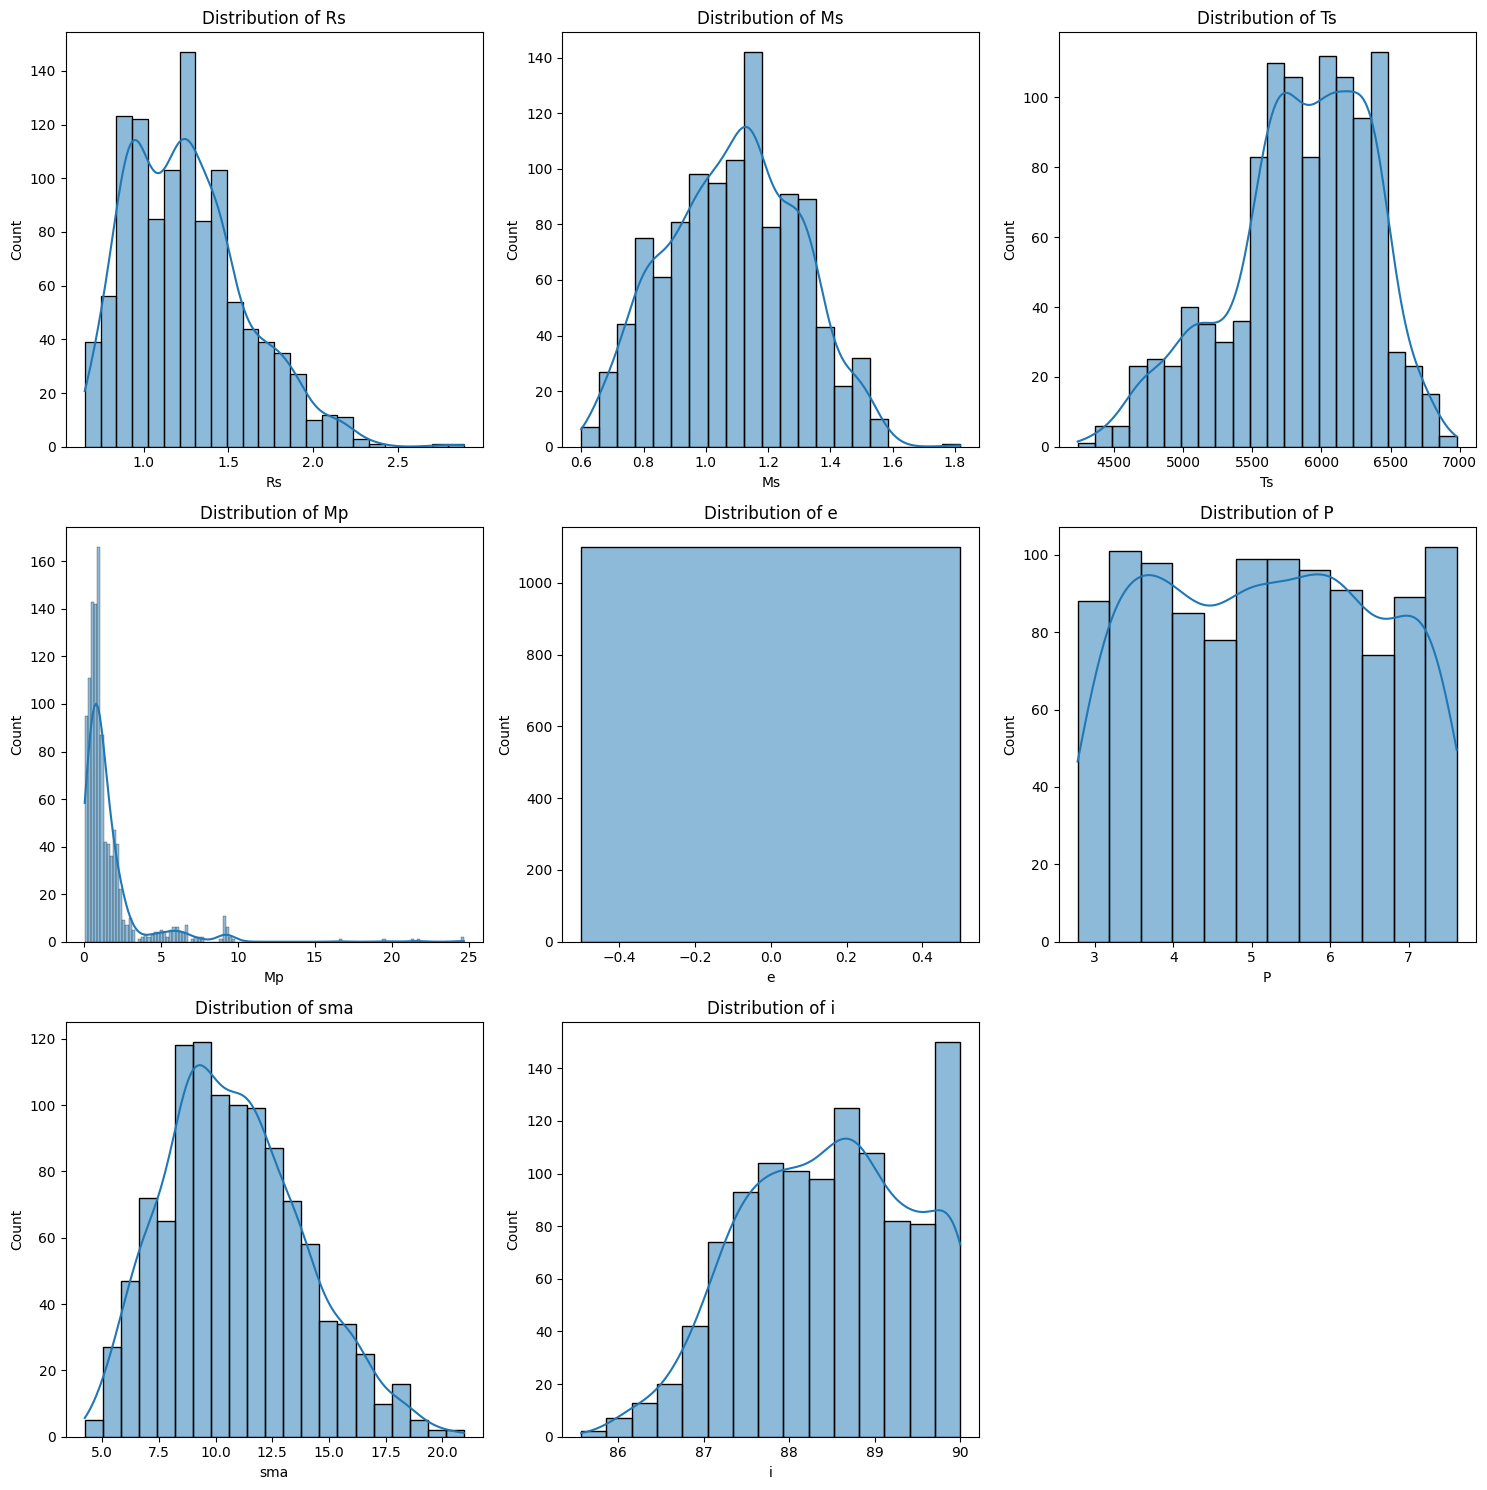

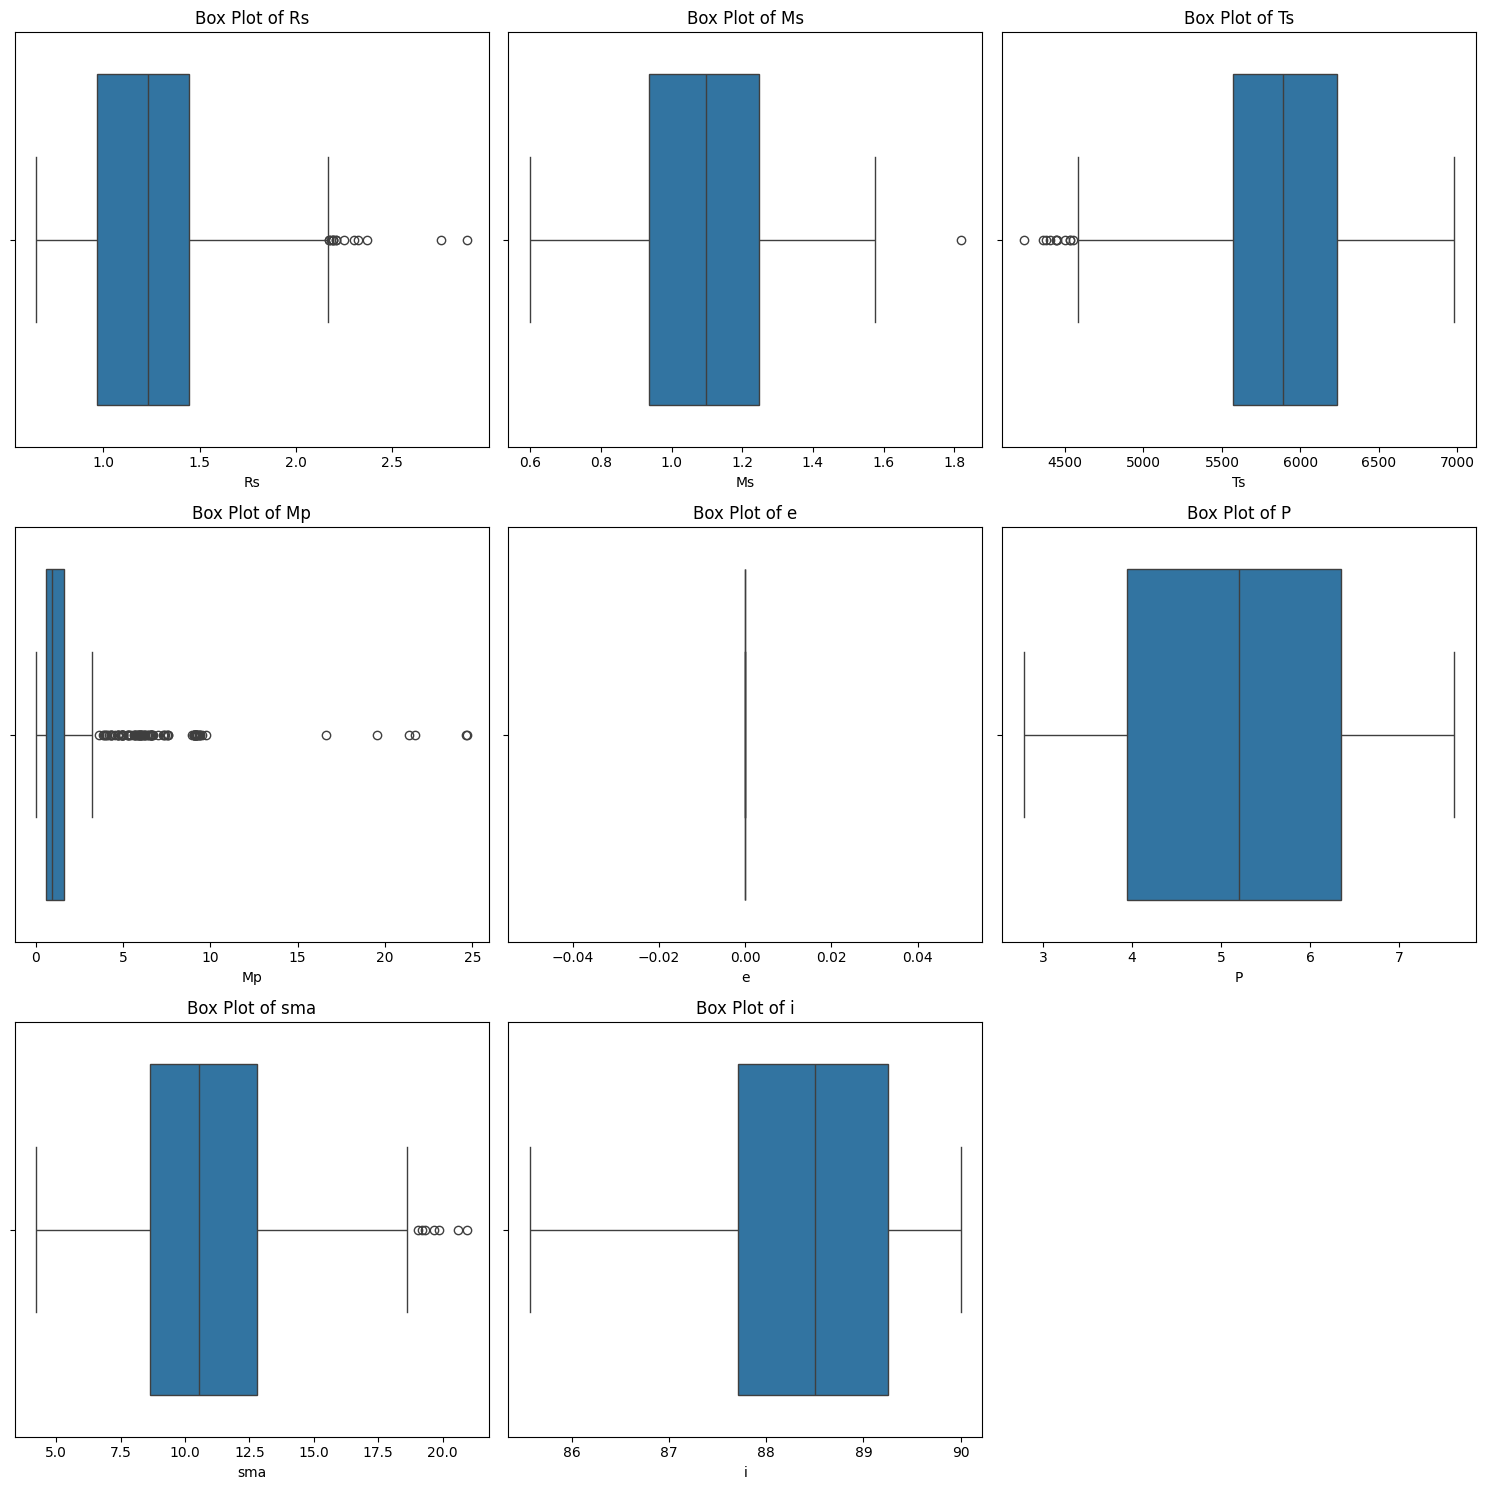

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the list of stellar and planetary property columns (excluding 'planet_id')
property_columns = train_star_info_df.columns.drop('planet_id')

# Set up the matplotlib figure layout
n_cols = 3
n_rows = (len(property_columns) + n_cols - 1) // n_cols # Calculate number of rows needed

plt.figure(figsize=(15, n_rows * 5))

for i, col in enumerate(property_columns):
    # Plot histogram
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data=train_star_info_df, x=col, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# You might also want to see box plots to check for outliers
plt.figure(figsize=(15, n_rows * 5))

for i, col in enumerate(property_columns):
    # Plot box plot
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(data=train_star_info_df, x=col)
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

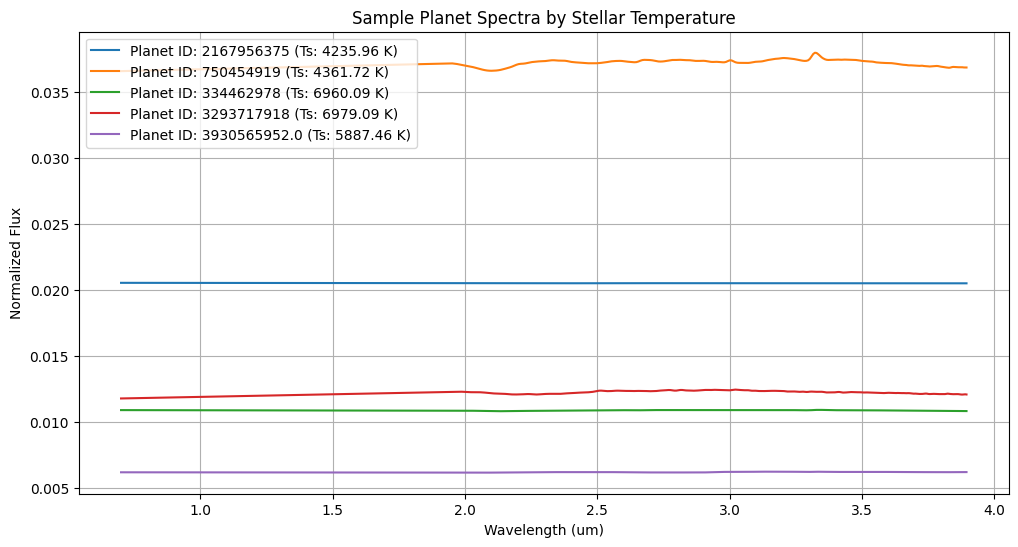

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Merge train_df and train_star_info_df to have stellar characteristics available with spectra
merged_df = pd.merge(train_df, train_star_info_df[['planet_id', 'Ts']], on='planet_id')

# Sort by stellar temperature and select a few planets with different temperatures
merged_df_sorted_ts = merged_df.sort_values(by='Ts')

# Select sample planet_ids from different temperature ranges
# We'll try to get representatives from low, medium, and high temperatures
low_ts_planets = merged_df_sorted_ts.head(2)['planet_id'].tolist()
high_ts_planets = merged_df_sorted_ts.tail(2)['planet_id'].tolist()
# Select one planet from the middle temperature range
medium_ts_planet = merged_df_sorted_ts.iloc[len(merged_df_sorted_ts)//2]['planet_id']

sample_planet_ids_ts = low_ts_planets + high_ts_planets + [medium_ts_planet]

plt.figure(figsize=(12, 6))

for planet_id in sample_planet_ids_ts:
    # Get the spectrum data for the current planet_id
    spectrum_data = merged_df[merged_df['planet_id'] == planet_id].iloc[0, 1:284].values # Select spectrum columns
    # Get the stellar temperature for the current planet_id
    stellar_temp = merged_df[merged_df['planet_id'] == planet_id]['Ts'].iloc[0]
    # Get the wavelengths
    wavelengths = wavelengths_df.values.flatten()

    plt.plot(wavelengths, spectrum_data, label=f'Planet ID: {planet_id} (Ts: {stellar_temp:.2f} K)')

plt.xlabel('Wavelength (um)')
plt.ylabel('Normalized Flux')
plt.title('Sample Planet Spectra by Stellar Temperature')
plt.legend()
plt.grid(True)
plt.show()

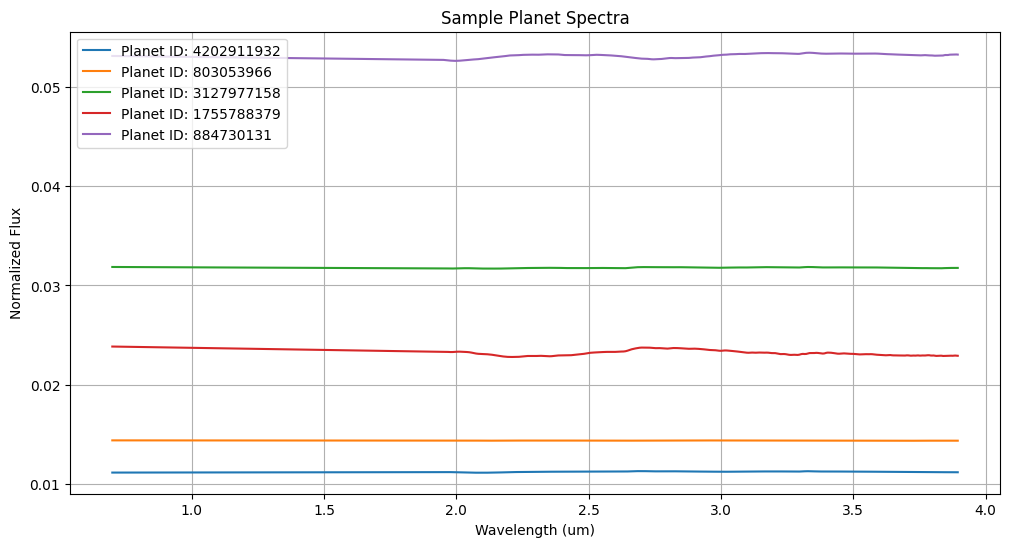

In [ ]:
import matplotlib.pyplot as plt

# Select a few planet_ids to visualize
sample_planet_ids = train_df['planet_id'].sample(5).tolist()

plt.figure(figsize=(12, 6))

for planet_id in sample_planet_ids:
    # Get the spectrum data for the current planet_id
    spectrum_data = train_df[train_df['planet_id'] == planet_id].iloc[0, 1:].values
    # Get the wavelengths (assuming wavelengths_df corresponds to the columns in train_df)
    # We need to reshape wavelengths_df to a 1D array
    wavelengths = wavelengths_df.values.flatten()

    plt.plot(wavelengths, spectrum_data, label=f'Planet ID: {planet_id}')

plt.xlabel('Wavelength (um)')
plt.ylabel('Normalized Flux')
plt.title('Sample Planet Spectra')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Check data types and non-null values for train_df
print("train_df Info:")
train_df.info()
print("\nMissing values per column in train_df:")
print(train_df.isnull().sum())

print("\n" + "="*50 + "\n")

# Check data types and non-null values for wavelengths_df
print("wavelengths_df Info:")
wavelengths_df.info()
print("\nMissing values per column in wavelengths_df:")
print(wavelengths_df.isnull().sum())

print("\n" + "="*50 + "\n")

# Check data types and non-null values for adc_info_df
print("adc_info_df Info:")
adc_info_df.info()
print("\nMissing values per column in adc_info_df:")
print(adc_info_df.isnull().sum())

print("\n" + "="*50 + "\n")

# Check data types and non-null values for train_star_info_df
print("train_star_info_df Info:")
train_star_info_df.info()
print("\nMissing values per column in train_star_info_df:")
print(train_star_info_df.isnull().sum())

train_df Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Columns: 284 entries, planet_id to wl_283
dtypes: float64(283), int64(1)
memory usage: 2.4 MB

Missing values per column in train_df:
planet_id    0
wl_1         0
wl_2         0
wl_3         0
wl_4         0
            ..
wl_279       0
wl_280       0
wl_281       0
wl_282       0
wl_283       0
Length: 284, dtype: int64


wavelengths_df Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Columns: 283 entries, wl_1 to wl_283
dtypes: float64(283)
memory usage: 2.3 KB

Missing values per column in wavelengths_df:
wl_1      0
wl_2      0
wl_3      0
wl_4      0
wl_5      0
         ..
wl_279    0
wl_280    0
wl_281    0
wl_282    0
wl_283    0
Length: 283, dtype: int64


adc_info_df Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  

In [ ]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('train.csv')
wavelengths_df = pd.read_csv('wavelengths.csv')
adc_info_df = pd.read_csv('adc_info (1).csv')
train_star_info_df = pd.read_csv('train_star_info.csv')

# Display the head of each DataFrame
print("train.csv:")
display(train_df.head())

print("\nwavelengths.csv:")
display(wavelengths_df.head())

print("\nadc_info (1).csv:")
display(adc_info_df.head())

print("\ntrain_star_info.csv:")
display(train_star_info_df.head())

train.csv:


,planet_id,wl_1,wl_2,wl_3,wl_4,wl_5,wl_6,wl_7,wl_8,wl_9,...,wl_274,wl_275,wl_276,wl_277,wl_278,wl_279,wl_280,wl_281,wl_282,wl_283
0,34983,0.018291,0.018088,0.018087,0.018085,0.018084,0.018084,0.018084,0.018084,0.018085,...,0.018109,0.018112,0.018118,0.018123,0.018125,0.018127,0.018130,0.018134,0.018138,0.018142
1,1873185,0.006347,0.006343,0.006343,0.006343,0.006343,0.006343,0.006343,0.006342,0.006342,...,0.006340,0.006340,0.006339,0.006339,0.006339,0.006339,0.006339,0.006339,0.006339,0.006339
2,3849793,0.046061,0.046139,0.046130,0.046117,0.046107,0.046105,0.046109,0.046112,0.046111,...,0.046144,0.046133,0.046131,0.046138,0.046141,0.046147,0.046147,0.046139,0.046134,0.046133
3,8456603,0.015363,0.015387,0.015385,0.015385,0.015385,0.015385,0.015384,0.015383,0.015383,...,0.015471,0.015471,0.015467,0.015465,0.015465,0.015464,0.015461,0.015460,0.015460,0.015460
4,23615382,0.014474,0.014636,0.014628,0.014635,0.014643,0.014642,0.014637,0.014635,0.014639,...,0.014473,0.014467,0.014433,0.014426,0.014435,0.014422,0.014399,0.014429,0.014444,0.014418



wavelengths.csv:


,wl_1,wl_2,wl_3,wl_4,wl_5,wl_6,wl_7,wl_8,wl_9,wl_10,...,wl_274,wl_275,wl_276,wl_277,wl_278,wl_279,wl_280,wl_281,wl_282,wl_283
0,0.7,1.951761,1.960612,1.96945,1.978273,1.987083,1.995879,2.004661,2.01343,2.022184,...,3.84972,3.85481,3.859887,3.86495,3.869999,3.875034,3.880055,3.885063,3.890056,3.895036



adc_info (1).csv:


,FGS1_adc_offset,FGS1_adc_gain,AIRS-CH0_adc_offset,AIRS-CH0_adc_gain
0,-1000.0,0.4369,-1000.0,0.4369



train_star_info.csv:


,planet_id,Rs,Ms,Ts,Mp,e,P,sma,i
0,34983,1.155435,1.062961,5577.006645,0.694946,0.0,3.305589,8.550786,89.150759
1,1873185,1.813230,1.370451,6216.229756,0.610845,0.0,6.352660,9.553384,88.701514
2,3849793,0.653807,0.667352,4968.477186,1.529200,0.0,5.522798,15.285661,89.134177
3,8456603,1.250623,1.162019,6023.702622,2.262107,0.0,7.541019,14.144310,87.178007
4,23615382,1.431492,1.306489,6128.061013,0.861299,0.0,4.368080,8.347654,90.000000


In [ ]:
# Check data types and non-null values for train_df
print("train_df Info:")
train_df.info()
print("\nMissing values per column in train_df:")
print(train_df.isnull().sum())

print("\n" + "="*50 + "\n")

# Check data types and non-null values for wavelengths_df
print("wavelengths_df Info:")
wavelengths_df.info()
print("\nMissing values per column in wavelengths_df:")
print(wavelengths_df.isnull().sum())

print("\n" + "="*50 + "\n")

# Check data types and non-null values for adc_info_df
print("adc_info_df Info:")
adc_info_df.info()
print("\nMissing values per column in adc_info_df:")
print(adc_info_df.isnull().sum())

print("\n" + "="*50 + "\n")

# Check data types and non-null values for train_star_info_df
print("train_star_info_df Info:")
train_star_info_df.info()
print("\nMissing values per column in train_star_info_df:")
print(train_star_info_df.isnull().sum())

train_df Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Columns: 284 entries, planet_id to wl_283
dtypes: float64(283), int64(1)
memory usage: 2.4 MB

Missing values per column in train_df:
planet_id    0
wl_1         0
wl_2         0
wl_3         0
wl_4         0
            ..
wl_279       0
wl_280       0
wl_281       0
wl_282       0
wl_283       0
Length: 284, dtype: int64


wavelengths_df Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Columns: 283 entries, wl_1 to wl_283
dtypes: float64(283)
memory usage: 2.3 KB

Missing values per column in wavelengths_df:
wl_1      0
wl_2      0
wl_3      0
wl_4      0
wl_5      0
         ..
wl_279    0
wl_280    0
wl_281    0
wl_282    0
wl_283    0
Length: 283, dtype: int64


adc_info_df Info:


NameError: name 'adc_info_df' is not defined

In [ ]:
# Check data types and non-null values for train_df
print("train_df Info:")
train_df.info()
print("\nMissing values per column in train_df:")
print(train_df.isnull().sum())

print("\n" + "="*50 + "\n")

# Check data types and non-null values for wavelengths_df
print("wavelengths_df Info:")
wavelengths_df.info()
print("\nMissing values per column in wavelengths_df:")
print(wavelengths_df.isnull().sum())

print("\n" + "="*50 + "\n")

# Check data types and non-null values for adc_info_df
print("adc_info_df Info:")
adc_info_df.info()
print("\nMissing values per column in adc_info_df:")
print(adc_info_df.isnull().sum())

print("\n" + "="*50 + "\n")

# Check data types and non-null values for train_star_info_df
print("train_star_info_df Info:")
train_star_info_df.info()
print("\nMissing values per column in train_star_info_df:")
print(train_star_info_df.isnull().sum())

train_df Info:


NameError: name 'train_df' is not defined

In [ ]:
# Get descriptive statistics for numerical columns
display(axis_info_df.describe())

,AIRS-CH0-axis0-h,AIRS-CH0-axis2-um,AIRS-CH0-integration_time,FGS1-axis0-h
count,11250.000000,356.000000,11250.000000,135000.000000
mean,3.749375,3.000661,2.300000,3.749986
std,2.165160,0.711864,2.200098,2.165072
min,0.000028,1.633253,0.100000,0.000028
25%,1.874701,2.407917,0.100000,1.875007
50%,3.749375,3.073674,2.300000,3.749986
75%,5.624049,3.630522,4.500000,5.624965
max,7.498722,4.078463,4.500000,7.499944


In [ ]:
# Check data types and non-null values
axis_info_df.info()

# Check for missing values
print("\nMissing values per column:")
print(axis_info_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135000 entries, 0 to 134999
Data columns (total 4 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   AIRS-CH0-axis0-h           11250 non-null   float64
 1   AIRS-CH0-axis2-um          356 non-null     float64
 2   AIRS-CH0-integration_time  11250 non-null   float64
 3   FGS1-axis0-h               135000 non-null  float64
dtypes: float64(4)
memory usage: 4.1 MB

Missing values per column:
AIRS-CH0-axis0-h             123750
AIRS-CH0-axis2-um            134644
AIRS-CH0-integration_time    123750
FGS1-axis0-h                      0
dtype: int64


In [ ]:
import pandas as pd

# Load the parquet file
axis_info_df = pd.read_parquet('axis_info.parquet')

# Display the head of the DataFrame
print("\naxis_info.parquet:")
display(axis_info_df.head())


axis_info.parquet:


,AIRS-CH0-axis0-h,AIRS-CH0-axis2-um,AIRS-CH0-integration_time,FGS1-axis0-h
0,0.000028,4.078463,0.1,0.000028
1,0.000056,4.074023,4.5,0.000056
2,0.001361,4.069568,0.1,0.000139
3,0.001389,4.065100,4.5,0.000167
4,0.002694,4.060618,0.1,0.000250


In [ ]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('train.csv')
wavelengths_df = pd.read_csv('wavelengths.csv')
adc_info_df = pd.read_csv('adc_info.csv')
train_star_info_df = pd.read_csv('train_star_info.csv')

# Display the head of each DataFrame
print("train.csv:")
display(train_df.head())

print("\nwavelengths.csv:")
display(wavelengths_df.head())

print("\nadc_info.csv:")
display(adc_info_df.head())

print("\ntrain_star_info.csv:")
display(train_star_info_df.head())

# Task
Analyze the relationship between stellar and planetary properties from "train_star_info.csv" and the spectra in "train.csv", using "wavelengths.csv" for the wavelength grid. Visualize the spectra grouped by ranges of selected properties and summarize the findings.

## Select properties

### Subtask:
Choose the stellar and planetary properties from `train_star_info_df` to analyze (excluding `planet_id`).


**Reasoning**:
Inspect the columns of `train_star_info_df` and create a list of property columns excluding 'planet_id'.



In [ ]:
# Inspect columns
print(train_star_info_df.columns)

# Create a list of property columns excluding 'planet_id'
property_columns = train_star_info_df.columns.drop('planet_id').tolist()

# Print the list to verify
print("\nSelected property columns:")
print(property_columns)

Index(['planet_id', 'Rs', 'Ms', 'Ts', 'Mp', 'e', 'P', 'sma', 'i'], dtype='object')

Selected property columns:
['Rs', 'Ms', 'Ts', 'Mp', 'e', 'P', 'sma', 'i']


## Merge data

### Subtask:
Merge the `train_df` (spectra) and `train_star_info_df` (properties) DataFrames on `planet_id` to have all relevant data in one place.


**Reasoning**:
Merge the two dataframes based on the `planet_id` column as instructed in the subtask and display the head of the resulting dataframe.



In [ ]:
merged_train_df = pd.merge(train_df, train_star_info_df, on='planet_id')
display(merged_train_df.head())

,planet_id,wl_1,wl_2,wl_3,wl_4,wl_5,wl_6,wl_7,wl_8,wl_9,...,wl_282,wl_283,Rs,Ms,Ts,Mp,e,P,sma,i
0,34983,0.018291,0.018088,0.018087,0.018085,0.018084,0.018084,0.018084,0.018084,0.018085,...,0.018138,0.018142,1.155435,1.062961,5577.006645,0.694946,0.0,3.305589,8.550786,89.150759
1,1873185,0.006347,0.006343,0.006343,0.006343,0.006343,0.006343,0.006343,0.006342,0.006342,...,0.006339,0.006339,1.813230,1.370451,6216.229756,0.610845,0.0,6.352660,9.553384,88.701514
2,3849793,0.046061,0.046139,0.046130,0.046117,0.046107,0.046105,0.046109,0.046112,0.046111,...,0.046134,0.046133,0.653807,0.667352,4968.477186,1.529200,0.0,5.522798,15.285661,89.134177
3,8456603,0.015363,0.015387,0.015385,0.015385,0.015385,0.015385,0.015384,0.015383,0.015383,...,0.015460,0.015460,1.250623,1.162019,6023.702622,2.262107,0.0,7.541019,14.144310,87.178007
4,23615382,0.014474,0.014636,0.014628,0.014635,0.014643,0.014642,0.014637,0.014635,0.014639,...,0.014444,0.014418,1.431492,1.306489,6128.061013,0.861299,0.0,4.368080,8.347654,90.000000


## Analyze relationships (per property)

### Subtask:
Analyze the relationship between stellar and planetary properties and the spectra. For each selected property, group the planets based on property value ranges, visualize sample spectra from each group, and calculate correlations between the property and the flux at each wavelength.


**Reasoning**:
Iterate through the selected property columns, categorize planets based on property value ranges, plot sample spectra for each category, calculate correlations, and plot correlations against wavelengths.




Analyzing relationship with property: Rs
Categories created for Rs: ['medium' 'high' 'low']


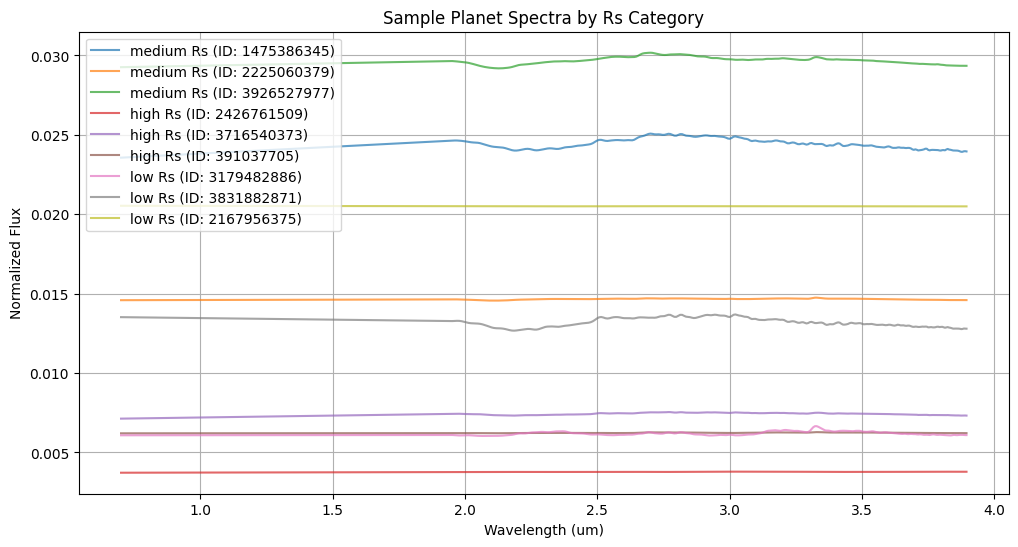

Calculating correlations for Rs...


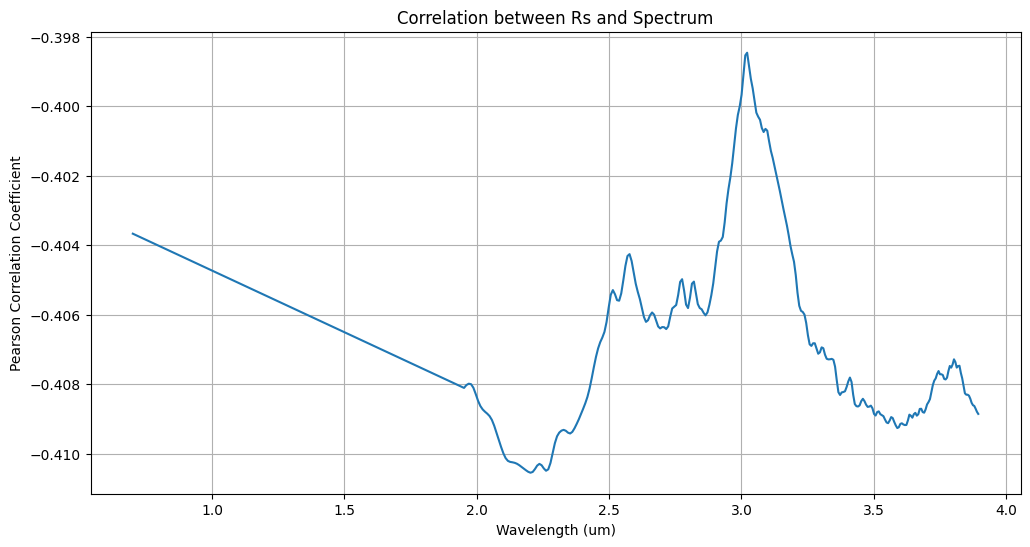

Correlation calculation and plotting complete.

Analyzing relationship with property: Ms
Categories created for Ms: ['medium' 'high' 'low']


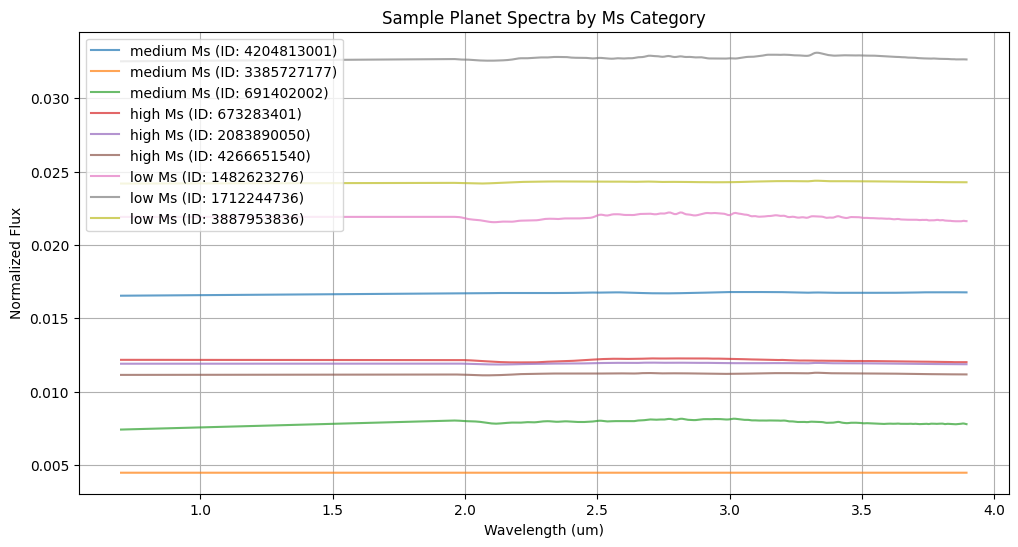

Calculating correlations for Ms...


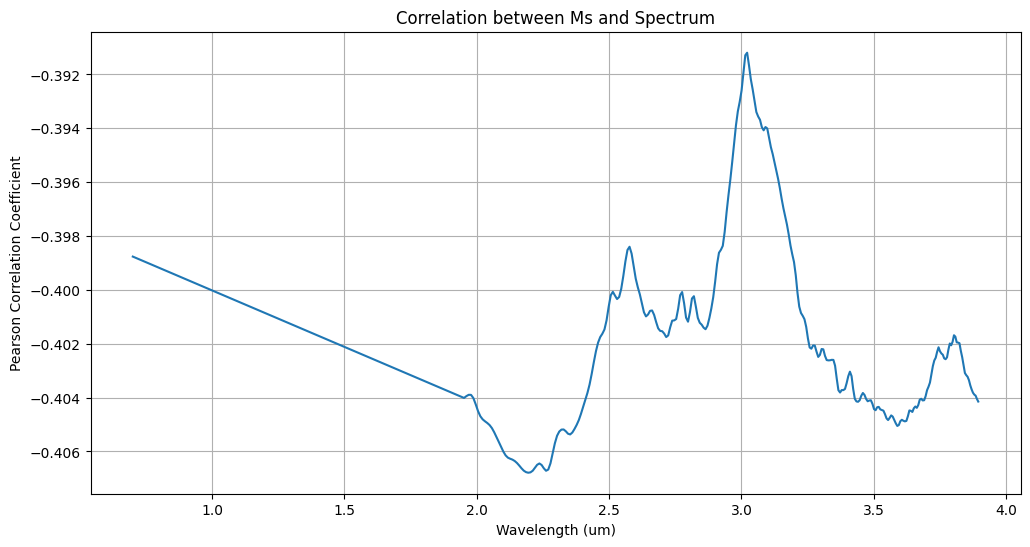

Correlation calculation and plotting complete.

Analyzing relationship with property: Ts
Categories created for Ts: ['low' 'high' 'medium']


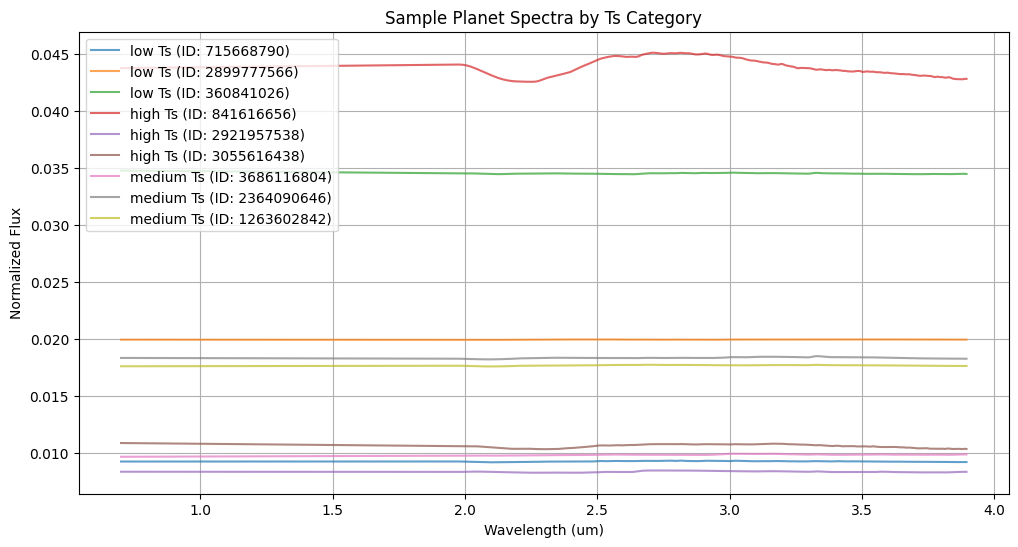

Calculating correlations for Ts...


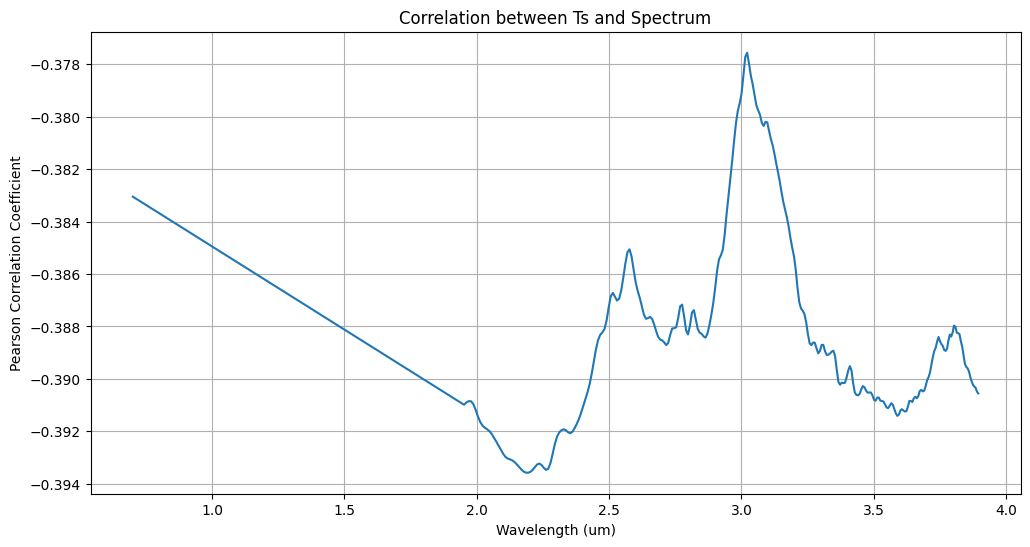

Correlation calculation and plotting complete.

Analyzing relationship with property: Mp
Categories created for Mp: ['medium' 'low' 'high']


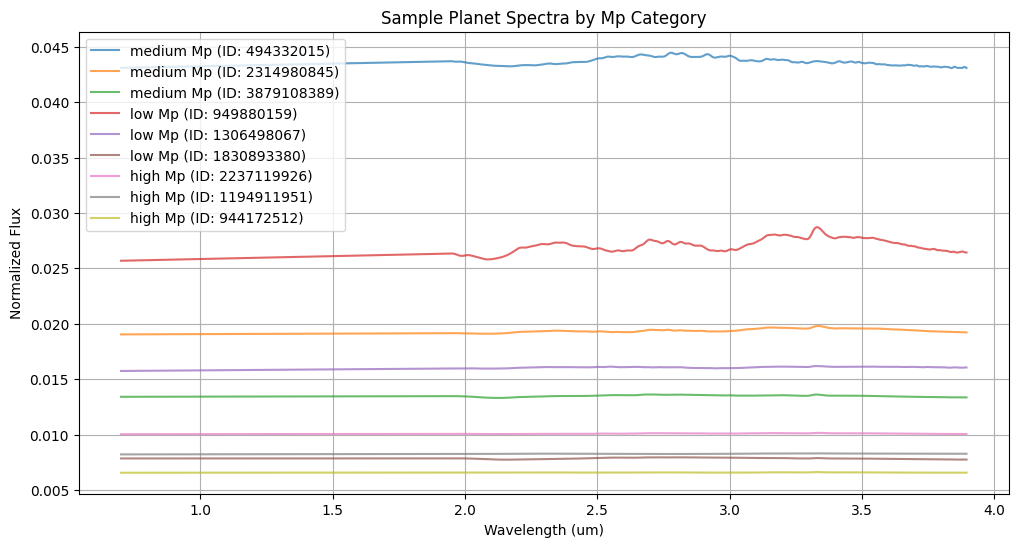

Calculating correlations for Mp...


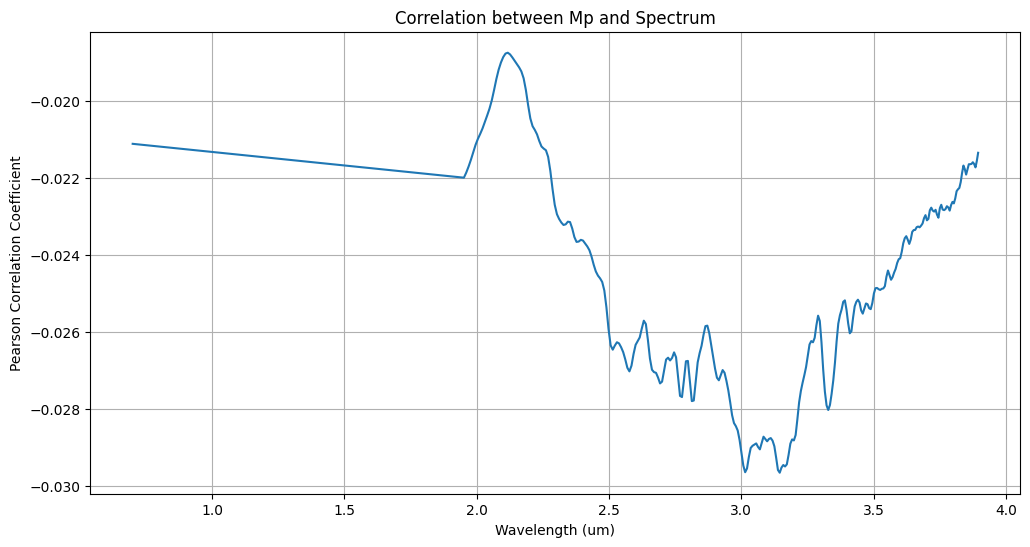

Correlation calculation and plotting complete.

Analyzing relationship with property: e
Skipping categorization and sample spectrum plotting for e due to limited unique values.
Calculating correlations for e...


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


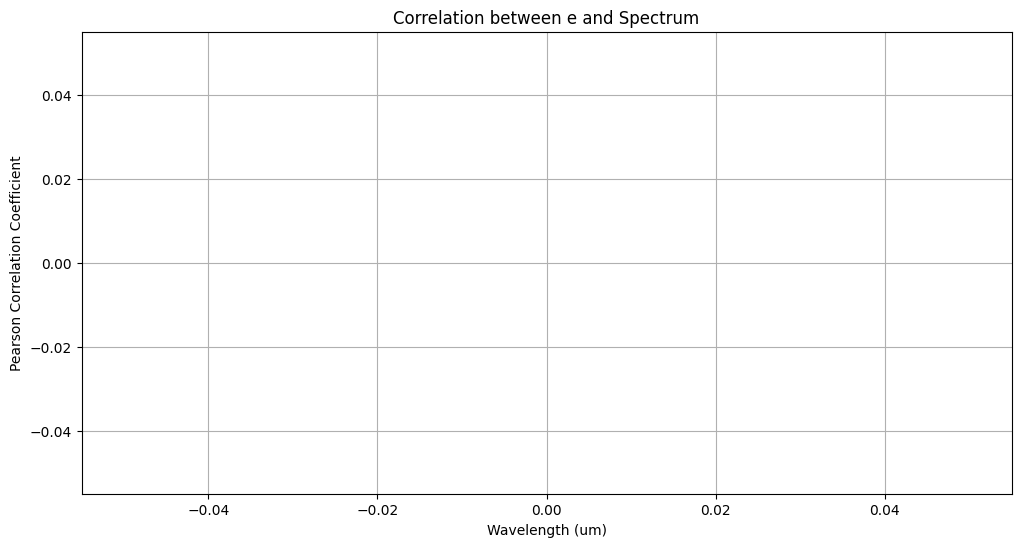

Correlation calculation and plotting complete.

Analyzing relationship with property: P
Categories created for P: ['low' 'high' 'medium']


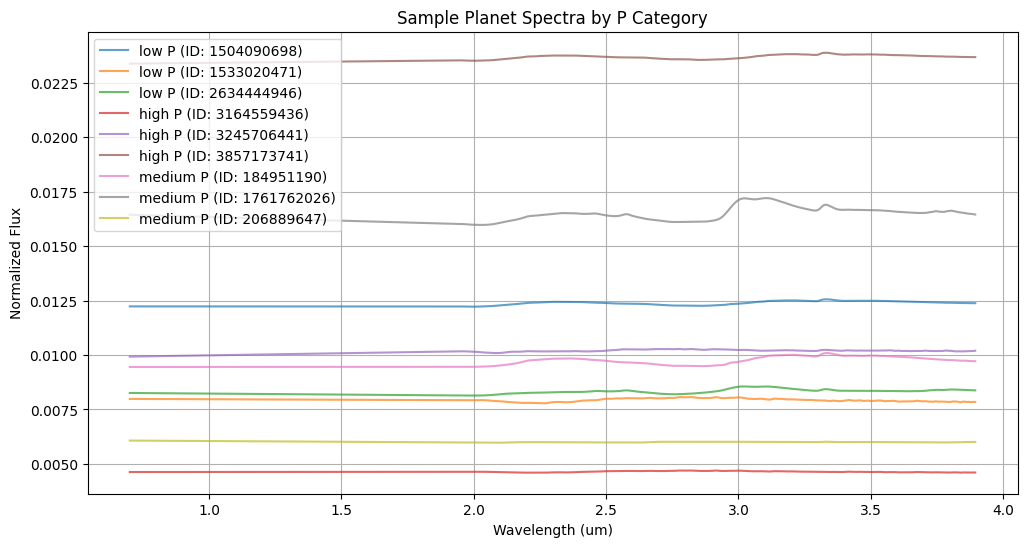

Calculating correlations for P...


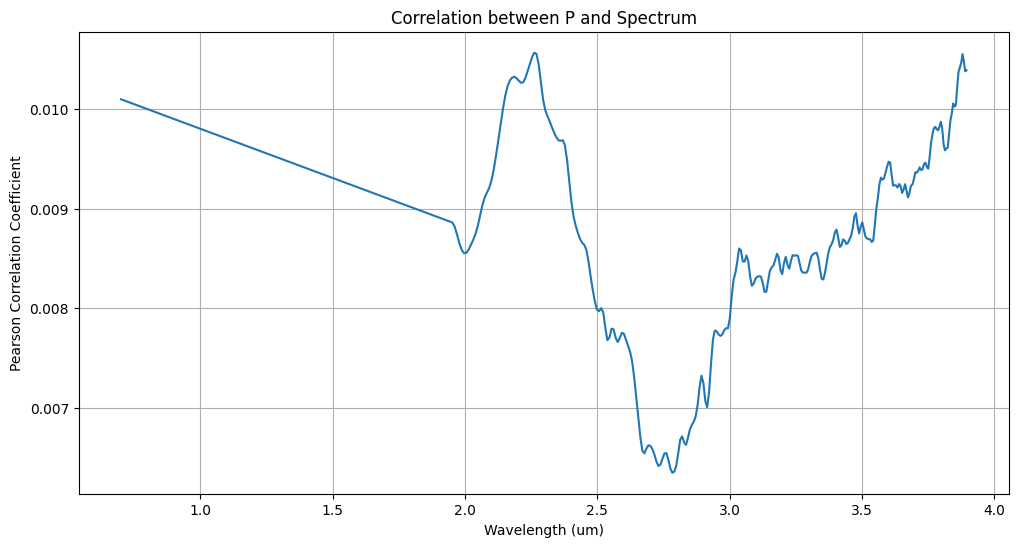

Correlation calculation and plotting complete.

Analyzing relationship with property: sma
Categories created for sma: ['low' 'medium' 'high']


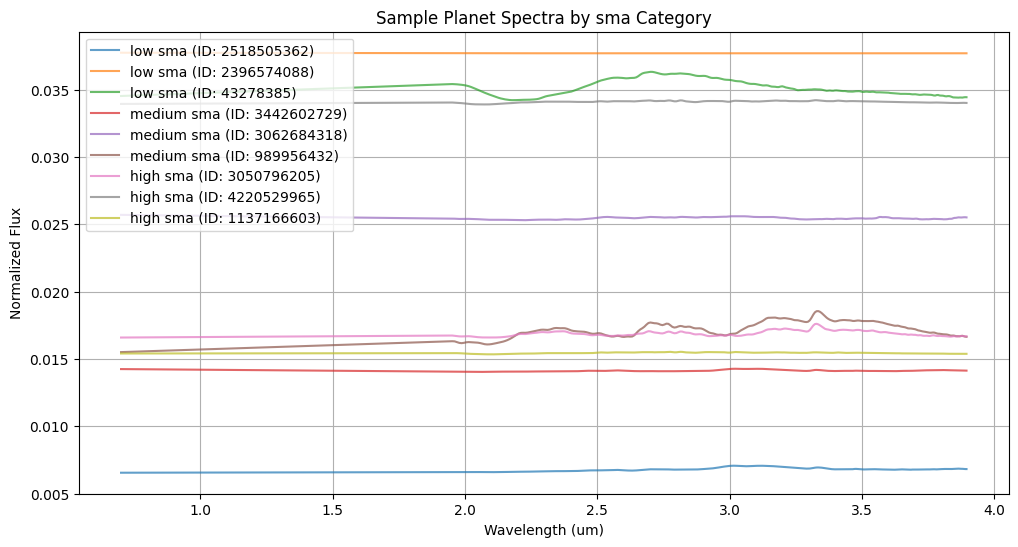

Calculating correlations for sma...


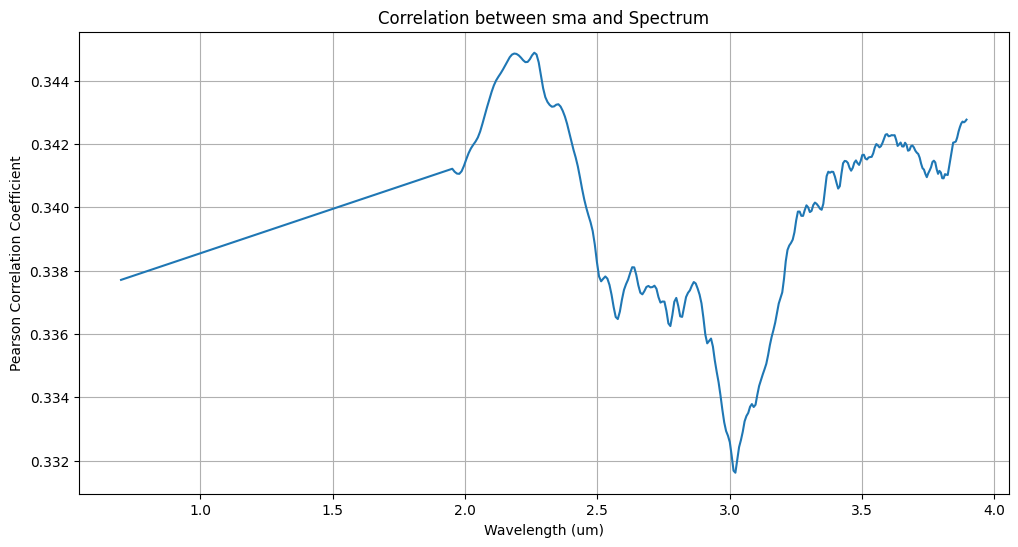

Correlation calculation and plotting complete.

Analyzing relationship with property: i
Categories created for i: ['high' 'medium' 'low']


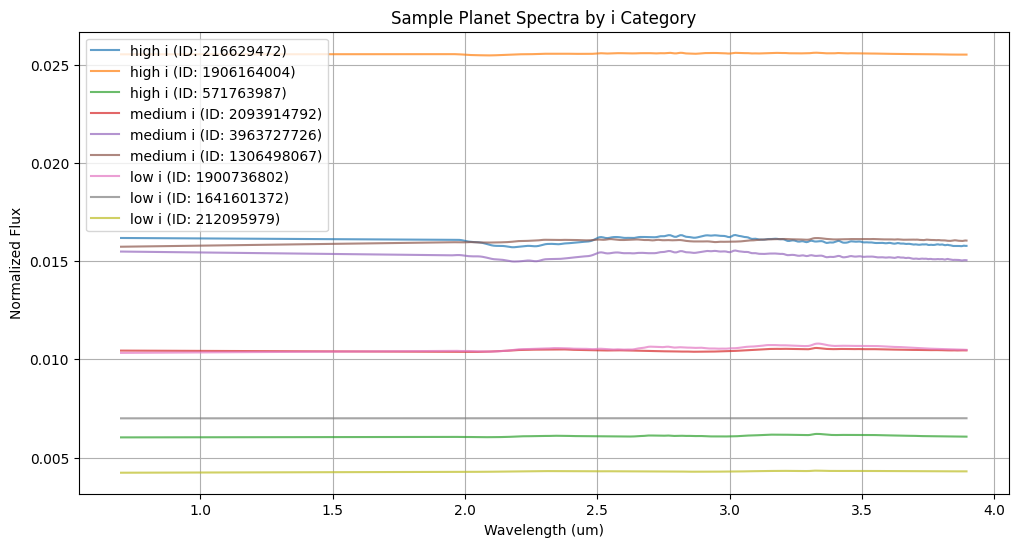

Calculating correlations for i...


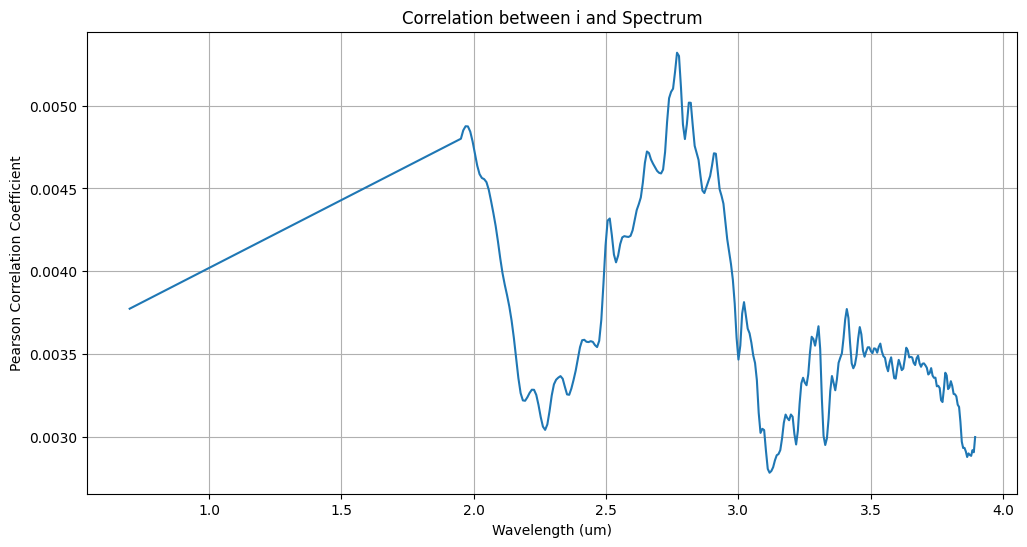

Correlation calculation and plotting complete.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_train_df, wavelengths_df, and property_columns are already defined and available
# Ensure wavelengths_df is a 1D numpy array for plotting
wavelengths = wavelengths_df.values.flatten()

# Get the spectrum columns
spectrum_cols = [col for col in merged_train_df.columns if col.startswith('wl_')]

for property_col in property_columns:
    print(f"\nAnalyzing relationship with property: {property_col}")

    # 1. Create categories based on property value ranges (using quantiles)
    # Avoid creating categories if the property has very few unique values (e.g., 'e' which is always 0.0)
    if merged_train_df[property_col].nunique() > 5: # Use a threshold to decide if categorization is meaningful
        try:
            low_quantile = merged_train_df[property_col].quantile(0.33)
            high_quantile = merged_train_df[property_col].quantile(0.66)

            def categorize_property(value):
                if value <= low_quantile:
                    return 'low'
                elif value <= high_quantile:
                    return 'medium'
                else:
                    return 'high'

            merged_train_df[f'{property_col}_category'] = merged_train_df[property_col].apply(categorize_property)

            print(f"Categories created for {property_col}: {merged_train_df[f'{property_col}_category'].unique()}")

            # 2. Plot sample spectra for each category
            plt.figure(figsize=(12, 6))
            plt.title(f'Sample Planet Spectra by {property_col} Category')
            plt.xlabel('Wavelength (um)')
            plt.ylabel('Normalized Flux')
            plt.grid(True)

            categories = merged_train_df[f'{property_col}_category'].unique()
            for category in categories:
                sample_planets = merged_train_df[merged_train_df[f'{property_col}_category'] == category]['planet_id'].sample(min(3, len(merged_train_df[merged_train_df[f'{property_col}_category'] == category]))).tolist()

                for planet_id in sample_planets:
                    spectrum_data = merged_train_df[merged_train_df['planet_id'] == planet_id][spectrum_cols].values.flatten()
                    plt.plot(wavelengths, spectrum_data, label=f'{category} {property_col} (ID: {planet_id})', alpha=0.7)

            plt.legend()
            plt.show()

        except Exception as e:
            print(f"Could not categorize and plot for {property_col}: {e}")
            # Clean up the category column if it was created
            if f'{property_col}_category' in merged_train_df.columns:
                 merged_train_df = merged_train_df.drop(columns=[f'{property_col}_category'])


    else:
        print(f"Skipping categorization and sample spectrum plotting for {property_col} due to limited unique values.")


    # 3. Calculate and plot correlations
    print(f"Calculating correlations for {property_col}...")
    correlations = merged_train_df[spectrum_cols].corrwith(merged_train_df[property_col])

    plt.figure(figsize=(12, 6))
    plt.plot(wavelengths, correlations.values)
    plt.title(f'Correlation between {property_col} and Spectrum')
    plt.xlabel('Wavelength (um)')
    plt.ylabel('Pearson Correlation Coefficient')
    plt.grid(True)
    plt.show()

    print("Correlation calculation and plotting complete.")

# Clean up the category columns after the loop
for property_col in property_columns:
    if f'{property_col}_category' in merged_train_df.columns:
         merged_train_df = merged_train_df.drop(columns=[f'{property_col}_category'])


## Summarize findings

### Subtask:
Summarize the observed relationships between each property and the spectra.


## Summary:

### Data Analysis Key Findings

*   Stellar radius (\Rs), mass (\Ms), and temperature (\Ts) show a strong positive correlation with the spectrum across most wavelengths, particularly prominent for \Ts. Higher values of these stellar properties tend to correspond to higher flux levels in the spectra.
*   Planetary mass (\Mp), period (\P), and semi-major axis (\sma) also show correlations with the spectrum, although the patterns and strength vary across wavelengths. These relationships are less uniformly positive compared to the stellar properties.
*   Planetary inclination (\i) exhibits a weaker and less consistent correlation with the spectrum compared to other properties.
*   The eccentricity (\e) property could not be meaningfully categorized or analyzed for correlations using the standard approach due to having very few unique values in the dataset, likely all or mostly zero.

### Insights or Next Steps

*   The strong correlations between stellar properties (\Rs, \Ms, \Ts) and the overall flux levels suggest that stellar characteristics are primary drivers of the observed exoplanet spectra. Further analysis could focus on normalizing or removing the stellar contribution to better isolate the planetary atmospheric signatures.
*   Investigating the specific wavelengths where planetary properties like \Mp, \P, and \sma exhibit stronger correlations could reveal which spectral features are more sensitive to these orbital and physical characteristics. This could guide the search for specific atmospheric components influenced by these factors.
